## Conditional Formatting in Pandas

Do you want to impress people more?! Maybe changing the data display style will help you!

In [1]:
import pandas as pd

I found this nice and useful dataset [here](https://www.kaggle.com/datasets/harikrishnareddyb/used-car-price-predictions), guys!

The columns are like this:

- Price: The price of the car in U.S. Dollar (probably)
- Year: Year of the car purchased (probably for the last time)
- Mileage: The number of kilometers driven by car
- City: In which city it was sold (for the nth time)
- State: In which state it was sold (yeah, it is the United States of America)
- Vin: A unique # for a car
- Make: Manufacturer of the car
- Model: The model/name of the car

In [2]:
df = pd.read_csv('./datasets/used_car_prices.csv')
df.head()

Price  Year  Mileage          City State                Vin       Make  \
0  10700  2016    41710       Hammond    LA  1FADP3K20GL204227       Ford   
1  16995  2014    62782  Philadelphia    PA  2G1125S32E9156193  Chevrolet   
2  30788  2016    18646       Merriam    KS  5N1AZ2MH6GN140391     Nissan   
3  35595  2015    15981        Isanti    MN  1FTEW1EP7FFC94373       Ford   
4  24995  2015    20080    Egg Harbor    NJ  1N6AD0EV0FN727290     Nissan   

            Model  
0  FocusHatchback  
1       Impala2LT  
2       MuranoAWD  
3        F-1504WD  
4    FrontierCrew

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Price    4500 non-null   int64 
 1   Year     4500 non-null   int64 
 2   Mileage  4500 non-null   int64 
 3   City     4500 non-null   object
 4   State    4500 non-null   object
 5   Vin      4500 non-null   object
 6   Make     4500 non-null   object
 7   Model    4500 non-null   object
dtypes: int64(3), object(5)
memory usage: 281.4+ KB


In [4]:
df.describe()

Price         Year        Mileage
count    4500.000000  4500.000000    4500.000000
mean    21439.944222  2013.228667   53280.172000
std     13084.398393     3.450011   41647.071418
min      1500.000000  1997.000000       5.000000
25%     12999.000000  2012.000000   23957.000000
50%     18497.500000  2014.000000   40681.500000
75%     26997.250000  2016.000000   74298.000000
max    239900.000000  2018.000000  350000.000000

In [5]:
df.nunique()

Price      2560
Year         22
Mileage    4409
City       1433
State        54
Vin        4500
Make         48
Model       952
dtype: int64

Let's go for a cool grouping:

In [6]:
df.groupby(by=['Make']).agg({
    'Model': ['count', 'min', 'max'],
    'Price': ['min', 'max', 'mean'],
    'Year': ['min', 'max'],
    'State': ['min', 'max'],
})

Model                                       Price          \
              count                 min             max     min     max   
Make                                                                      
Acura            58          ILX5-Speed    TSXAutomatic    3545   48000   
Alfa              1               Romeo           Romeo   43977   43977   
Audi             72                  A3     allroad2.0T    6999  115984   
BMW             189                   1     i3Hatchback    4493   57276   
Bentley           2         BentaygaW12     Continental  142900  239900   
Buick            75  EnclaveConvenience    VeranoVerano    7590   40000   
Cadillac         69                 ATS      XTSPremium    2000   65995   
Chevrolet       546        Avalanche2WD     VoltPlug-In    2651   74800   
Chrysler         83              2002dr            Town    2003   30909   
Dodge           181          Avenger4dr             Ram    1790   64990   
FIAT              4           500Lounge     500eBATTERY    7500   11999   
Ford            573               C-Max         Transit    2600   65498   
Freightliner      1            Sprinter        Sprinter   28995   28995   
GMC             155              Acadia        YukonAWD    2750   70991   
Genesis           1             G803.8L         G803.8L   36999   36999   
HUMMER            6               H24dr           H34dr    8999   23700   
Honda           265              Accord     S2000Manual    3450   41291   
Hyundai         171           AccentGLS     VeracruzAWD    3680   29999   
INFINITI         70            FX35Base         QX804WD    6650   92594   
Jaguar           12   F-TYPEConvertible           XK2dr    4500   79888   
Jeep            231         Cherokee4WD   WranglerSport    3950   60995   
Kia             149      CadenzaPremium      SportageLX    2995   31995   
Land             18               Rover           Rover   13950   92991   
Lexus           100                  CT              SC    2500   80888   
Lincoln          32  ContinentalReserve            Town    3995   59998   
MINI             27              Cooper         Hardtop    6000   30000   
Maserati          1        GhibliGhibli    GhibliGhibli   49888   49888   
Maybach           1               574dr           574dr   69800   69800   
Mazda            71             CX-3AWD      TributeFWD    3995   29797   
McLaren           1          570GTCoupe      570GTCoupe  199995  199995   
Mercedes-Benz   129          C-Class4dr        Sprinter    4995   89000   
Mercury           7               Grand  Mountaineer4dr    3500   10777   
Mitsubishi       20          Eclipse3dr       Raider2WD    1500   41999   
Nissan          345             350Z2dr         cube5dr    3799   97995   
Plymouth          1          Prowler2dr      Prowler2dr   35995   35995   
Pontiac           7               G84dr         Vibe4dr    4995   13590   
Porsche          28                 911   PanameraTurbo   17995  137778   
Ram             112             15004WD   ProMaster3500   11977   58995   
Saab              2              9-32dr          9-34dr    6900    7995   
Saturn            8             Aura4dr          VUEAWD    2200    9980   
Scion            11       FR-SAutomatic           xD5dr   10465   19980   
Subaru           75                  B9              XV    3995   33663   
Suzuki            1        SX4Hatchback    SX4Hatchback    9990    9990   
Tesla             2               Model           Model   37900   77995   
Toyota          439          4Runner2WD         YarisLE    2100   78599   
Volkswagen      116              Beetle   e-GolfLimited    3625   29995   
Volvo            26             S402.4L         XC90AWD    2995   44380   
smart             6              fortwo      fortwopure    5900    8995   

                              Year       State       
                        mean   min   max   min  max  
Make                                                 
Acura           20480.4137

Top 15 companies based on the most production:

<AxesSubplot: xlabel='Make'>

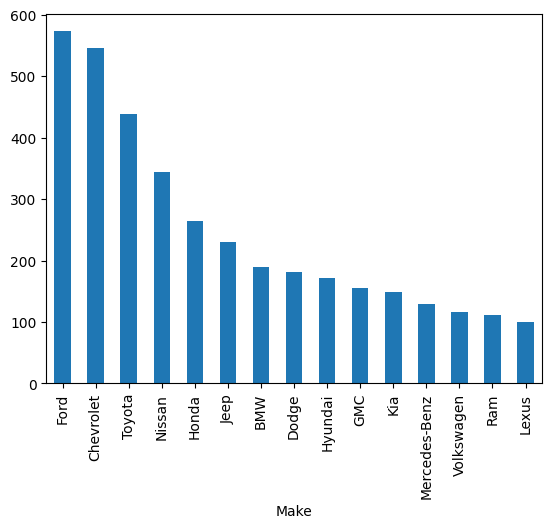

In [7]:
df.groupby(by=['Make'])['Model'] \
  .count() \
  .sort_values(ascending=False) \
  .head(15) \
  .plot(kind='bar')

Average car price over years:

<AxesSubplot: xlabel='Year'>

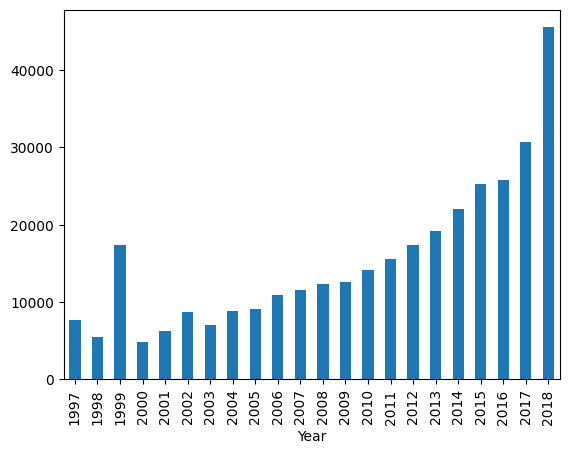

In [8]:
df.groupby(by=['Year'])['Price'] \
  .mean() \
  .plot(kind='bar')

<AxesSubplot: ylabel='Make'>

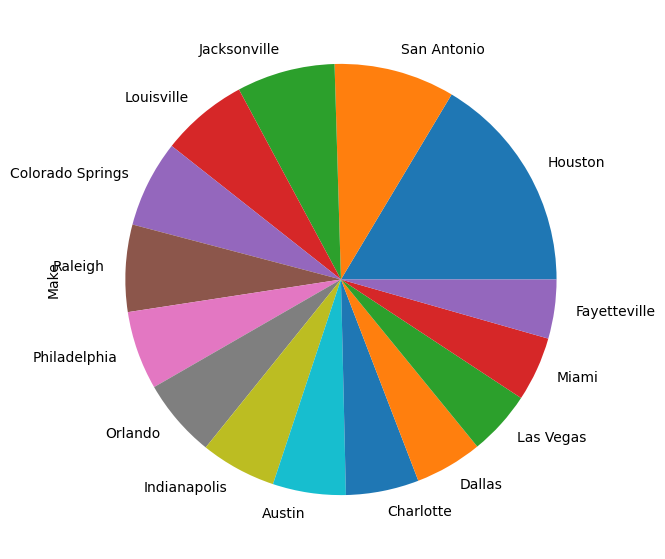

In [9]:
df.groupby(by=['City'])['Make'] \
  .count() \
  .sort_values(ascending=False) \
  .head(15) \
  .plot(kind='pie', figsize=(10, 7))

In [10]:
df.corr()

/tmp/ipykernel_148555/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Price      Year   Mileage
Price    1.000000  0.438598 -0.453883
Year     0.438598  1.000000 -0.776092
Mileage -0.453883 -0.776092  1.000000

Now we start styling:

In [11]:
df.corr() \
  .style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_148555/591468611.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() \


Highlighting cars whose prices are lower than the specified budget:

In [12]:
budget = 14300

In [13]:
df.style.applymap(lambda x: 'background-color: #ff2990' if x <= budget else '', subset=['Price'])

In [16]:
def bold_matched_rows(row: pd.Series) -> list[str]:
    """Bolds the row if the car price is less than the budget."""
    if row['Price'] <= budget:
        return ['font-weight: bold'] * len(row)  # Or `len(df.columns)`
    return ['font-weight: regular'] * len(row)

In [17]:
df.style.apply(bold_matched_rows, axis=1)

Some tips to help you implement new things faster:

- `pandas.DataFrame.style.applymap(func)`: For element-wise styles
- `pandas.DataFrame.style.apply(func, axis=None)`: For table-wise styles
- `pandas.DataFrame.style.apply(func, axis=0)`: For column-wise styles
- `pandas.DataFrame.style.apply(func, axis=1)`: For row-wise styles

Not so cool, right? Maybe the following code is better:

In [18]:
df[df['Price'] <= budget]

Price  Year  Mileage          City State                Vin       Make  \
0     10700  2016    41710       Hammond    LA  1FADP3K20GL204227       Ford   
6     14285  2013    59969       Calumet    IL  2GNFLNEK6D6379986  Chevrolet   
11     9685  2016    31685    Fort Worth    TX  3FADP4BJ1GM122471       Ford   
13    12982  2015    12176    Scottsdale    AZ  KNDJN2A23F7812944        Kia   
14    13499  2012    55656    Brook Park    OH  JN1DV6AR4CM731050   INFINITI   
...     ...   ...      ...           ...   ...                ...        ...   
4481  11955  2010   124553        Mobile    AL  2FMDK3KC4ABB41363       Ford   
4483  10402  2011    67704  Indianapolis    IN  1HGCP2E7XBA002766      Honda   
4485   9931  2011    51336   Little Rock    AR  WMWZP3C57BTX82548       MINI   
4488   9877  2005   138329      Manassas    VA  1N6AD06W35C441242     Nissan   
4492  13985  2015    38077       Reedley    CA  1C3CCCAB6FN633205   Chrysler   

               Model  
0     FocusHatchback  
6         EquinoxAWD  
11       FiestaSedan  
13        SoulManual  
14               G25  
...              ...  
4481         Edge4dr  
4483          Accord  
4485          Cooper  
4488        Frontier  
4492      200Limited  

[1369 rows x 8 columns]

In [19]:
def filter_cars(budget: float, year: int, make: list[str]) -> pd.DataFrame:
    """Filters the cars based on the given parameters."""
    make = [make] if isinstance(make, str) else make
    return df[(df['Price'] <= budget) & (df['Year'] >= year) & (df['Make'].isin(make))]

In [20]:
budget = 26500
year = 2016
make = ['Chevrolet', 'Porsche', 'Honda']

In [21]:
results = filter_cars(budget, year, make)
results

Price  Year  Mileage               City State                Vin  \
10    22000  2017    22710             Austin    TX  1G1105S30HU116210   
23    22888  2016    30573       Belle Plaine    MN  2GNALDEK1G6137342   
144   23497  2016     2477             Olathe    KS  1G1ZF5SX6GF246256   
149   17697  2016     7875             Temple    TX  KL7CJLSB6GB665023   
155   17233  2017    26562  North Little Rock    AR  1G1ZE5ST7HF200890   
...     ...   ...      ...                ...   ...                ...   
4432  15888  2016    42007        Santa Clara    CA  1G11C5SA1GF145112   
4442  14735  2016    19358       Newport News    VA  1G1PE5SB5G7127719   
4449  13450  2017    15257      Lawrenceville    GA  1G1BC5SM8H7130200   
4464  14688  2016    32078          Lexington    NC  1G1BE5SM9G7288912   
4496  16488  2017    22307          Baltimore    MD  1G1ZE5ST6HF208978   

           Make       Model  
10    Chevrolet    ImpalaLT  
23    Chevrolet  EquinoxFWD  
144   Chevrolet    MalibuLT  
149   Chevrolet     TraxFWD  
155   Chevrolet    MalibuLT  
...         ...         ...  
4432  Chevrolet      Malibu  
4442  Chevrolet       Cruze  
4449  Chevrolet  CruzeSedan  
4464  Chevrolet     CruzeLT  
4496  Chevrolet    MalibuLT  

[123 rows x 8 columns]

In [22]:
final_results = results.style \
    .bar(subset=['Price', 'Mileage'], vmax=budget, cmap='Reds') \
    .format({'Price': '${:,.0f}', 'Mileage': '{:,.0f}'}) \
    .set_caption('Cars That Fit the Budget') \
    .hide(axis=0)
final_results

In [23]:
final_results.to_html('./exports/used_car_prices.html')